In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random 

In [28]:
class Persona:
    def __init__(self,resource,productivity,science,wealth,income,saving,salary,InvestIncome,lifestatus,
                GainedInvest,PayInvest,WorkIncome,empleados,status,indice,production,clase,consumption):
        self.resource=resource
        self.productivity=productivity
        self.science=science
        self.wealth=wealth
        self.income=income
        self.saving=saving
        self.salary=salary
        self.InvestIncome=InvestIncome
        self.GainedInvest=GainedInvest
        self.PayInvest=PayInvest
        self.lifestatus=lifestatus #0->vivo #1-> muerto
        self.WorkIncome=WorkIncome
        self.empleados=empleados
        self.status=status #0->empleado #2->investor #1->ni empleado ni investor
        self.indice=indice
        self.production=production
        self.clase=clase
        self.consumption=consumption
    #asignar indice
    def a_indice(self,i):
        self.indice=i
    #calcular productivity
    def initial_productivity(self,mean,desviacion,t):
        p=random.gauss(mean,desviacion)
        if (p>0):
            self.productivity[t]=p
    #calcular production inicial
    def initial_production(self,t):
        self.production[t]=self.resource*self.productivity[t]*self.science
    def initial_wealth(self,i_wealth,t):
        self.wealth[t]=i_wealth
    def initial_saving(self,i_sav,t):
        self.saving[t]=i_sav
    #introducir empleados si es investor
    def guardar_empleado(self,identificador): #me va a guardar el indice de cada empleado
        self.empleados.append(identificador)

    


In [29]:
#calcular productividad para cada año
def c_productivity(agentes,t):
    for i in range(len(agentes)):
        if (agentes[i].lifestatus==0):
            agentes[i].productivity[t]=agentes[i].productivity[t-1]

In [30]:
#calcular production
def c_production(agentes,t):
    for i in range(len(agentes)):
        if (agentes[i].lifestatus==0):
            produc=agentes[i].resource*agentes[i].productivity[t]*agentes[i].science
            agentes[i].production[t]=produc

In [31]:
#calcular workIncome
def c_workincome(agentes,t):
    for i in range(len(agentes)):
        if (agentes[i].lifestatus==0):
            if (agentes[i].status==2): #si es inversionista
                agentes[i].WorkIncome[t]=agentes[i].production[t]
            if (agentes[i].status==0 or agentes[i].status==3): #si es empleado agregar status 3
                agentes[i].WorkIncome[t]=agentes[i].salary
            if (agentes[i].status==1): #si no es empleado ni inversionista
                agentes[i].WorkIncome[t]=agentes[i].production[t]

In [32]:
#creamos una funcion para definir el investincome
def c_investincome(agentes,t):
    invest=0
    for j in range(len(agentes)):
        if (agentes[j].status==2 and agentes[j].lifestatus==0):
            for k in agentes[j].empleados:
                invest=invest+agentes[k].production[t]-agentes[k].salary
            agentes[j].InvestIncome[t]=invest


In [33]:
#creamos una funcion para el income
def c_income(agentes,t):
    for i in range(len(agentes)):
        if (agentes[i].lifestatus==0):
            inc=agentes[i].WorkIncome[t]+agentes[i].InvestIncome[t]
            agentes[i].income[t]=inc

In [34]:
#creamos una funcion para wealth
def c_wealth(agentes,t,tau):
    for i in range(len(agentes)):
        if (agentes[i].lifestatus==0):
            w=agentes[i].income[t]+agentes[i].saving[t-1]*(1-1.0/tau)
            agentes[i].wealth[t]=w

In [35]:
#creamos funcion de distribucion de clase [0 alive,1 enough,2 satisfied,3 luxury]
def dist_clase(lista_consumo,agentes,t):
    for i in range(len(agentes)):
        if(agentes[i].lifestatus==0):
            for s in range(len(lista_consumo)):
                if (s!=len(lista_consumo)-1):
                    min=lista_consumo[s]
                    max=lista_consumo[s+1]
                    if (agentes[i].wealth[t]>=min and agentes[i].wealth[t]<max):
                        agentes[i].clase=s
                if (s==len(lista_consumo)-1):
                    if (agentes[i].wealth[t]>=max):
                         agentes[i].clase=s
            if (agentes[i].wealth[t]<lista_consumo[0]):
                    ind=agentes[i].indice
                    #print(ind,t)
                    broke_sale(ind,agentes,lista_consumo[0],5000,t)

In [36]:
#asignar consumo a cada uno
def asignar_consumo(agentes,lista_consumo,t):
    l_desviaciones=[500,1500,4*10**4,2*10**5]
    for i in range(len(agentes)):
        if(agentes[i].lifestatus==0):
            for s in range(len(lista_consumo)):
                if agentes[i].clase==s:
                    c=np.abs(random.gauss(0,l_desviaciones[s]))
                    consumo=lista_consumo[s]+c
                    if (consumo>=lista_consumo[s] and consumo<agentes[i].wealth[t]):
                        agentes[i].consumption[t]=consumo
                    if (consumo<lista_consumo[s] or consumo>agentes[i].wealth[t]):
                        agentes[i].consumption[t]=lista_consumo[s]
                    if (agentes[i].wealth[t]<lista_consumo[0]): #si esta muerto
                        agentes[i].consumption[t]=0

In [37]:
#creamos funcion para contar el numero de agentes en cada clase
def conteo_clase(agentes,clase0,clase1,clase2,clase3,t):
    s0=0
    s1=0
    s2=0
    s3=0
    for i in range(len(agentes)):
        if agentes[i].clase==0:
            s0=s0+1
        if agentes[i].clase==1:
            s1=s1+1
        if agentes[i].clase==2:
            s2=s2+1
        if agentes[i].clase==3:
            s3=s3+1
    clase0[t]=s0
    clase1[t]=s1
    clase2[t]=s2
    clase3[t]=s3    

In [38]:
#funcion de interaccion tipo Broke sale
def broke_sale(i,agentes,e_alive,e_satisfied,t):
    
#for j in range(len(agentes)):
    if(agentes[i].wealth[t]<e_alive):
        j=random.randint(0,len(agentes)-1)
        expected_productivity=0
        expected_production=0
        if(i!=j and agentes[j].wealth[t]>=1*10**4):
            expected_productivity=np.divide(agentes[i].productivity[t]+agentes[j].productivity[t],2)
            expected_production=agentes[i].resource*expected_productivity*agentes[i].science
        #print('riqueza i antes de broke sale',agentes[i].wealth[t],t)
        if (expected_production-e_alive>0 and agentes[j].status!=0):
            #agentes[j].resource[t]=agentes[j].resource[t]+agentes[i].resource[t]
            #agentes[i].resource[t]=1
            #venta del recurso
            #print('riqueza j antes de broke sale',agentes[j].wealth[t])
            #print('i',i,'j',j,'t',t)
            agentes[i].GainedInvest[t]=e_alive
            #cambio en la energia
            #agentes[i].wealth[t]=agentes[i].wealth[t]+e_alive
            #agentes[j].wealth[t]=agentes[j].wealth[t]-e_alive
            #print('riqueza i despues bsale',agentes[i].wealth[t])
            #print('riqueza j despues bsale',agentes[j].wealth[t])
            #cambia la productividad
            agentes[i].productivity[t]=np.divide(agentes[i].productivity[t]+agentes[j].productivity[t],2)
            #agentes[i].c_production(t)
            agentes[i].salary=e_alive
            agentes[j].guardar_empleado(agentes[i].indice)
            setattr(agentes[i],'status',0)#cambiar status->empleado
            setattr(agentes[j],'status',2)#cambiar status->investor


In [68]:
def premium_buying(agentes,t):
    pot_sellers=[]
    pot_investors=[]
    for i in range(len(agentes)):
        if (agentes[i].lifestatus==0):
            if (agentes[i].productivity[t]<6000 and agentes[i].status==1):
                    pot_sellers.append(agentes[i])
                    #print('seller',agentes[i].indice)
            if ((agentes[i].productivity[t]>12000) and (agentes[i].status!=0 and agentes[i].status!=3)):
                    pot_investors.append(agentes[i])
                    #print('investor',agentes[i].indice)
    
    #ordenamos los sellers con su productividad
    pot_sellers.sort(key=lambda x: x.productivity[t])
    #calculmamos suma potenctial investors
    suma=sum(c.wealth[t] for c in pot_investors)
    #print(suma)
    
    #calculamos probabilidad individual
    probj=0
    #tomar un investor aleatorio y calcular su probabilidad
    for m in pot_sellers:
        j=random.randint(0,len(pot_investors)-1)
        probj=np.divide(pot_investors[j].wealth[t],suma)
        if (probj>0.5):
                m.GainedInvest[t]=2*m.consumption[t]
                m.salary=1.1*m.production[t]
                m.productivity[t]=np.divide(m.productivity[t]
                                                         +pot_investors[j].productivity[t],2)
                pot_investors[j].guardar_empleado(m.indice)
                setattr(m,'status',3)#cambiar status a 3->empleado premium buying
                setattr(pot_investors[j],'status',2)#cambiar status a 2->investor
                #print(m.status)
                

        
                


In [40]:
#funcion para borrar personas que mueren
def borrar_agente(agentes,e_alive,t):
    for i in range(len(agentes)):
        if (agentes[i].wealth[t]<e_alive and agentes[i].status!=0):
            setattr(agentes[i],'lifestatus',1) #pasar su estado a muerto
            #print('agente que murio',agente.indice)
            #print('life status agente muerto',agente.lifestatus)
            #print('año de muerte',t)


In [41]:
#calcular PayInvest
def pay_invest(agentes,t):
    pi=0
    for j in range(len(agentes)):
        if (agentes[j].status==2 and agentes[j].lifestatus==0):
            for k in agentes[j].empleados:
                pi=pi+agentes[k].GainedInvest[t]
                #print('cada paso de tiempo',pi)
            agentes[j].PayInvest[t]=pi
            #print('final pi',pi)
            pi=0
        #print('pi vaciado',pi)

In [42]:
#calcular saving
def c_saving(agentes,t):
    sav=0
    for i in range(len(agentes)):
        if(agentes[i].lifestatus==0):
            sav=agentes[i].wealth[t]+agentes[i].GainedInvest[t]-agentes[i].consumption[t]-agentes[i].PayInvest[t]
            #print(sav,t)
            agentes[i].saving[t]=sav
            '''
        if (agentes[i].status==0):
            sav=agentes[i].wealth[t]-2500+agentes[i].GainedInvest[t]-agentes[i].consumption[t]-agentes[i].PayInvest[t]
            agentes[i].saving[t]=sav
        if (agentes[i].status==1 and agentes[i].wealth[t]>=2500):
            sav=agentes[i].wealth[t]+agentes[i].GainedInvest[t]-agentes[i].consumption[t]-agentes[i].PayInvest[t]
            agentes[i].saving[t]=sav
        if (agentes[i].status==1 and agentes[i].wealth[t]<2500):
            sav=0
            agentes[i].saving[t]=sav
        '''

In [77]:
#Inicializacion por defecto creamos un vector de objetos y lo llenamos
#random.seed(0)
poblacion=[]#array de objetos que tiene a cada persona
N=1*20**1
n_tsteps=30
empleados_per=[]
l_production=np.zeros(n_tsteps)
l_workincome=np.zeros(n_tsteps)
l_investincome=np.zeros(n_tsteps)
l_gainedinvest=np.zeros(n_tsteps)
l_payinvest=np.zeros(n_tsteps)
l_income=np.zeros(n_tsteps)
l_wealth=np.zeros(n_tsteps)
l_saving=np.zeros(n_tsteps)
l_consumption=np.zeros(n_tsteps)
l_productivity=np.zeros(n_tsteps)
l_alive=np.zeros(n_tsteps)
l_enough=np.zeros(n_tsteps)
l_satisfied=np.zeros(n_tsteps)
l_luxury=np.zeros(n_tsteps)
'''
Persona(self,resource,productivity,science,wealth,income,saving,salary,InvestIncome,lifestatus,
                GainedInvest,PayInvest,WorkIncome,empleados,status,indice,production,clase,consumption):
'''   
#para ---t=0-------
for i in range(N):
    per=Persona(1,l_productivity,1,l_wealth,l_income,l_saving,0,l_investincome,0,l_gainedinvest
                ,l_payinvest,l_workincome,empleados_per,1,0,l_production,0,l_consumption)
    poblacion.append(per) #introducimos cada objeto en el array
    poblacion[i].a_indice(i)#le asignamos su indice a cada uno
    poblacion[i].initial_productivity(5000,5000,0)#calculamos la productividad para cada uno mean y sd 5000
    poblacion[i].initial_production(0) #calculamos la produccion segun productivity
    poblacion[i].initial_wealth(5000,0)#asignamos inicialmente a todos la misma riqueza 5000
    poblacion[i].initial_saving(5000,0)#el mismo ahorro inicial 5000
    #poblacion[i].c_production(1)#calculamos la del año 1
    l_workincome=np.zeros(n_tsteps)
    l_production=np.zeros(n_tsteps)
    l_workincome=np.zeros(n_tsteps)
    l_investincome=np.zeros(n_tsteps)
    l_gainedinvest=np.zeros(n_tsteps)
    l_payinvest=np.zeros(n_tsteps)
    l_income=np.zeros(n_tsteps)
    l_wealth=np.zeros(n_tsteps)
    l_saving=np.zeros(n_tsteps)
    l_consumption=np.zeros(n_tsteps)
    l_productivity=np.zeros(n_tsteps)
    empleados_per=[]
conteo_clase(poblacion,l_alive,l_enough,l_satisfied,l_luxury,0)

In [ ]:
print(poblacion[0].production)
print(poblacion[1].production)
print(poblacion[2].production)

In [78]:
#----para t=1 hasta n_timesteps-1-----
#for t in range(1,n_timesteps,1):
#para t=1
random.seed(0)
lista_clase=[2500,7500,2*10**5,10**6]
for t in range(1,n_tsteps,1):
    #---primer paso------(1)
    c_productivity(poblacion,t)
    c_production(poblacion,t)
    c_workincome(poblacion,t)
    c_investincome(poblacion,t) 
    c_income(poblacion,t)
    c_wealth(poblacion,t,2)
    #---segundo paso-----(2) dist. clase y asignar consumo
    dist_clase(lista_clase,poblacion,t)
    borrar_agente(poblacion,lista_clase[0],t)
    asignar_consumo(poblacion,lista_clase,t)
    #ellos van a hacer premium buying despues de hacer broke sale
    premium_buying(poblacion,t)
    c_production(poblacion,t)#calculamos de nuevo production pues cambio la productividad
    #----tercer paso------(3)payinvest
    pay_invest(poblacion,t)
    #----cuarto paso-----(4) saving
    c_saving(poblacion,t)
    conteo_clase(poblacion,l_alive,l_enough,l_satisfied,l_luxury,t)
'''
for i in range(len(poblacion)):
    
    #print('workincome'+str(i),poblacion[i].WorkIncome)
    #print('investincome'+ str(i),poblacion[i].InvestIncome)
    #print('income'+str(i),poblacion[i].income)
    print('wealth'+str(i),poblacion[i].wealth)
    #print('clase'+str(i),poblacion[i].clase)
    print('gainedinvest'+str(i),poblacion[i].GainedInvest)
    print('consumo'+str(i),poblacion[i].consumption)
    print('payinvest'+str(i),poblacion[i].PayInvest)
    print('empleados'+str(i),poblacion[i].empleados)
    #print('saving'+str(i),poblacion[i].saving)
    print('status'+str(i),poblacion[i].status)
    #print('production'+str(i),poblacion[i].production)
    #print('productivity'+str(i),poblacion[i].productivity)
    #print('lifestatus'+str(i),poblacion[i].lifestatus)
'''

"\nfor i in range(len(poblacion)):\n    \n    #print('workincome'+str(i),poblacion[i].WorkIncome)\n    #print('investincome'+ str(i),poblacion[i].InvestIncome)\n    #print('income'+str(i),poblacion[i].income)\n    print('wealth'+str(i),poblacion[i].wealth)\n    #print('clase'+str(i),poblacion[i].clase)\n    print('gainedinvest'+str(i),poblacion[i].GainedInvest)\n    print('consumo'+str(i),poblacion[i].consumption)\n    print('payinvest'+str(i),poblacion[i].PayInvest)\n    print('empleados'+str(i),poblacion[i].empleados)\n    #print('saving'+str(i),poblacion[i].saving)\n    print('status'+str(i),poblacion[i].status)\n    #print('production'+str(i),poblacion[i].production)\n    #print('productivity'+str(i),poblacion[i].productivity)\n    #print('lifestatus'+str(i),poblacion[i].lifestatus)\n"

In [ ]:
print(poblacion[50].WorkIncome[5])

In [ ]:
#lista producticity inicial
l_pro=[]
for l in range(len(poblacion)):
    l_pro.append(poblacion[l].productivity[0])


In [ ]:
fig = plt.figure(figsize=(8,6))
intervalos=range(1,30000,800)
plt.hist(l_pro,bins=intervalos,color="skyblue",rwidth=0.85,lw=1,edgecolor='black')
plt.xlabel('Productividad')
plt.ylabel('Distribucion de individuos')
plt.title('Distribucion de productividad año 0')
#fig.savefig('productividadinicial.png')

In [75]:
lista_t=[]
for l in range(0,n_tsteps,1):
    lista_t.append(l)
print(lista_t)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


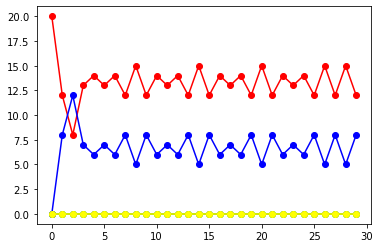

In [76]:
plt.plot(lista_t,l_alive,color='red',marker='o')
plt.plot(lista_t,l_enough,color='blue',marker='o')
plt.plot(lista_t,l_satisfied,color='green',marker='o')
plt.plot(lista_t,l_luxury,color='yellow',marker='o')